In [14]:
import pandas as pd
import numpy as np
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
#midata=pd.read_csv("C:\dat.csv")

midata=pd.read_excel("C:\Archivos Python\Temb1.xls",sheet_name='FLUJO')

del(midata['Unnamed: 0'],midata['Unnamed: 1'],midata['Unnamed: 3'],midata['Unnamed: 4'],midata['Unnamed: 5'])
midata=midata.fillna(0)
midata=midata.drop([0,1,2,40,42,48,100,104,105,107])
midata = midata.reset_index()

del(midata['index'])
midata=midata.drop(midata.index[1:33])
midata=midata.drop(midata.index[67:])


midata.drop(midata.columns[120:], axis=1, inplace=True)

midata.columns = midata.iloc[0]
midata=midata.drop([0])

midata
    

,0,2021-07-01 00:00:00,2021-08-01 00:00:00,2021-09-01 00:00:00,2021-10-01 00:00:00,2021-11-01 00:00:00,2021-12-01 00:00:00,2022-01-01 00:00:00,2022-02-01 00:00:00,2022-03-01 00:00:00,...,2030-08-01 00:00:00,2030-09-01 00:00:00,2030-10-01 00:00:00,2030-11-01 00:00:00,2030-12-01 00:00:00,2031-01-01 00:00:00,2031-02-01 00:00:00,2031-03-01 00:00:00,2031-04-01 00:00:00,2031-05-01 00:00:00
33,Ingresos x Ventas Dptos,0,25002,20884.2,25002,17627.9,25002,20884.2,25002,20884.2,...,0,0,0,0,0,0,0,0,0,0
34,Ingresos x Locales,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
35,Ingresos x Oficinas,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
36,Estacionamientos + Bodegas,0,2468,2468,2468,2468,2468,2468,2468,2468,...,0,0,0,0,0,0,0,0,0,0
37,Ventas + Estacionamientos,0,27470,23352.2,27470,20095.9,27470,23352.2,27470,23352.2,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,Costo Total,224758,6263.46,2812.06,3431.48,3886.77,5814.88,6215.03,8311.45,10463,...,0,0,0,0,0,0,0,0,0,0
95,(Obra en Ejecución),224758,2701.25,680.339,1002.37,1990.21,3385.77,4083.3,5882.34,8331.29,...,0,0,0,0,0,0,0,0,0,0
96,Giro de Credito según Necesidad de caja,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
97,Utilidad Op.,-224758,-4889.96,-1525.02,-1832.4,-2525.58,-3984.51,-4445.97,-6206.77,-8402.64,...,0,0,0,0,0,0,0,0,0,0


In [15]:
midata=midata.rename(columns={0:'Cuentas'})
midata=pd.melt(midata, id_vars=['Cuentas'])
midata

,Cuentas,0,value
0,Ingresos x Ventas Dptos,2021-07-01,0
1,Ingresos x Locales,2021-07-01,0
2,Ingresos x Oficinas,2021-07-01,0
3,Estacionamientos + Bodegas,2021-07-01,0
4,Ventas + Estacionamientos,2021-07-01,0
...,...,...,...
7849,Costo Total,2031-05-01,0
7850,(Obra en Ejecución),2031-05-01,0
7851,Giro de Credito según Necesidad de caja,2031-05-01,0
7852,Utilidad Op.,2031-05-01,0


In [16]:
midata=midata.rename(columns={0:'Fecha'})
midata=midata.rename(columns={'value':'Valor'})
midata
#midataf = midata[midata['Fecha'] =='2021-07-01']
midataf=midata
midataf

,Cuentas,Fecha,Valor
0,Ingresos x Ventas Dptos,2021-07-01,0
1,Ingresos x Locales,2021-07-01,0
2,Ingresos x Oficinas,2021-07-01,0
3,Estacionamientos + Bodegas,2021-07-01,0
4,Ventas + Estacionamientos,2021-07-01,0
...,...,...,...
7849,Costo Total,2031-05-01,0
7850,(Obra en Ejecución),2031-05-01,0
7851,Giro de Credito según Necesidad de caja,2031-05-01,0
7852,Utilidad Op.,2031-05-01,0


In [17]:
#midataf.groupby(midataf['Fecha'].dt.year)['Valor'].agg(['sum', 'mean', 'max'])
midataf = midata[midata['Cuentas'] =='Flujo de Caja Op.']
midatafG=midataf.groupby(midataf['Cuentas']).Valor.sum()
midatafG

Cuentas
Flujo de Caja Op.    147252.523788
Name: Valor, dtype: float64

In [18]:
midata["Filial"]="Pilares"
midata

,Cuentas,Fecha,Valor,Filial
0,Ingresos x Ventas Dptos,2021-07-01,0,Pilares
1,Ingresos x Locales,2021-07-01,0,Pilares
2,Ingresos x Oficinas,2021-07-01,0,Pilares
3,Estacionamientos + Bodegas,2021-07-01,0,Pilares
4,Ventas + Estacionamientos,2021-07-01,0,Pilares
...,...,...,...,...
7849,Costo Total,2031-05-01,0,Pilares
7850,(Obra en Ejecución),2031-05-01,0,Pilares
7851,Giro de Credito según Necesidad de caja,2031-05-01,0,Pilares
7852,Utilidad Op.,2031-05-01,0,Pilares


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]


<ipython-input-20-db73dc0c6845>:5: DeprecationWarning: numpy.npv is deprecated and will be removed from NumPy 1.20. Use numpy_financial.npv instead (https://pypi.org/project/numpy-financial/).
  result.append(np.npv(tasa/100,[-1000, 300, 300, 300, 300] ))


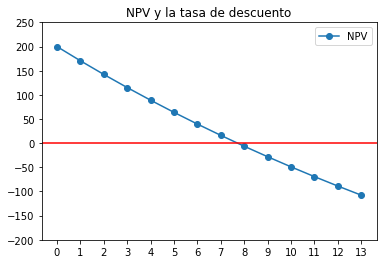

In [20]:

# Graficando el NPV en función de la tasa de descuento
def npv_irr(tasas):
    result = []
    for tasa in tasas:
        result.append(np.npv(tasa/100,[-1000, 300, 300, 300, 300] ))
    return result

tasas = list(range(14))
print(tasas)

plt.title("NPV y la tasa de descuento")
plt.plot(tasas, npv_irr(tasas), marker='o', label='NPV')
plt.axhline(0, color='red')
axes = plt.gca()
axes.set_ylim([-200,250])
plt.xticks(tasas)
plt.legend(loc='upper right')
plt.show()

In [22]:
import numpy_financial as npf

fc = [6300000, -550000, -550000, -550000, -550000, -550000, -550000, -550000, -550000, -550000, -550000, -550000, -550000 ]
tir = npf.irr(midata) * 100

print(tir)

ValueError: Input must be a rank-1 array.

In [5]:
df = pd.DataFrame({'A': {0: 'a', 1: 'b', 2: 'c'},
                   'B': {0: 1, 1: 3, 2: 5},
                   'C': {0: 2, 1: 4, 2: 6}})

df.drop(df.columns[0:2], axis=1, inplace=True)
df

,C
0,2
1,4
2,6


In [6]:
pd.melt(df, id_vars=['A'], value_vars=['B', 'C'])

KeyError: "The following 'id_vars' are not present in the DataFrame: ['A']"

In [ ]:
import pandas as pd
#midata=pd.read_csv("C:\dat.csv")

midata=pd.read_excel("C:\Archivos Python\Temb1.xls",sheet_name='FLUJO')
midata

columna=[]
#concatenar
for i in range(200):
    columna.append('Unnamed: '+ str(i+114))